# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing dan machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
# Memuat dataset ke dalam DataFrame
file_path = '/content/drive/MyDrive/Dataset Clustering/marketing_campaignV1.csv'
dataset = pd.read_csv(file_path, delimiter=';')

# Menampilkan informasi dataset
print("Informasi Dataset:")
print(dataset.info())

# Menampilkan 5 baris pertama dataset
print("\n5 Baris Pertama Dataset:")
print(dataset.head())



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWine

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Beberapa Baris Pertama Dataset:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

<ipython-input-5-cc191f051e63>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mean(), inplace=True)


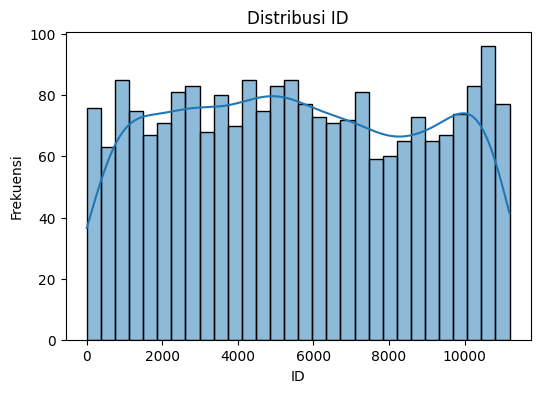

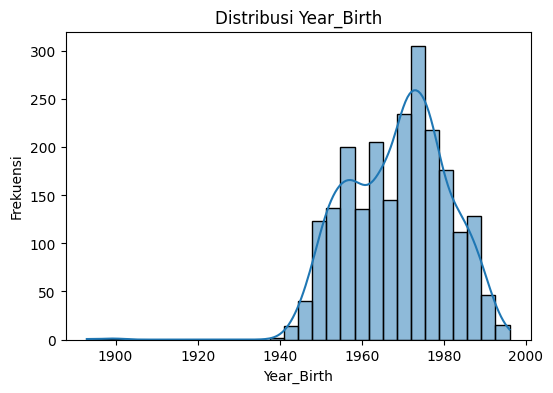

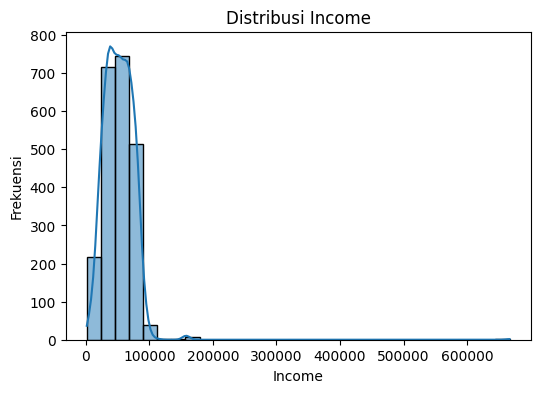

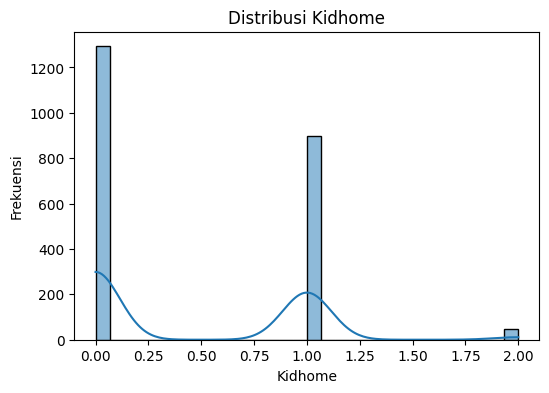

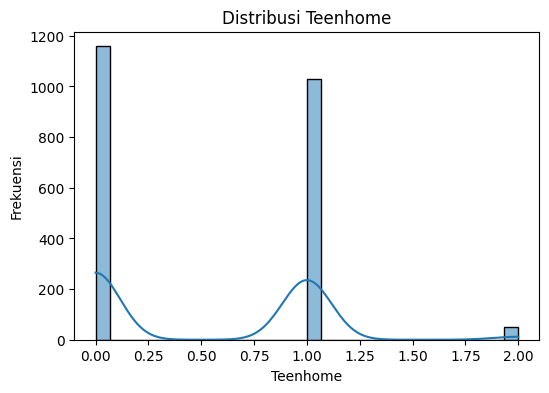

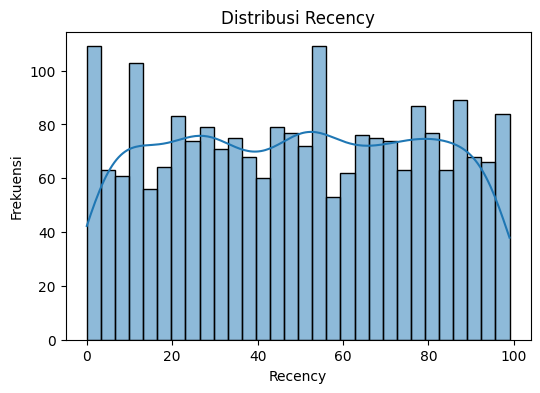

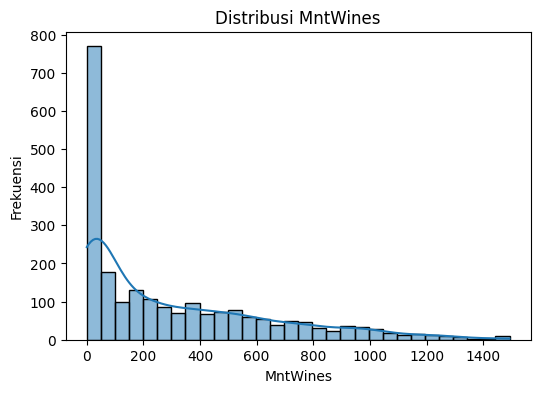

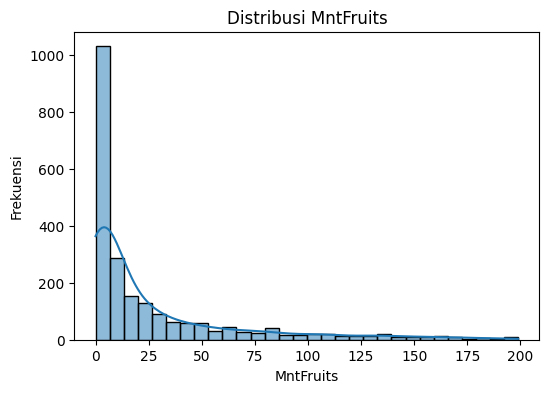

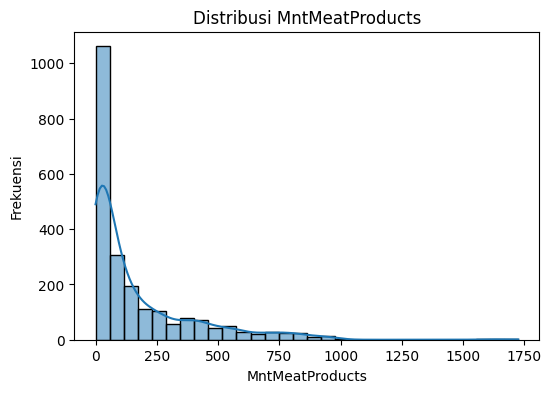

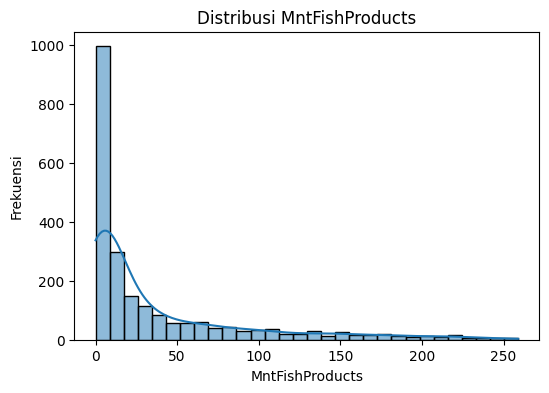

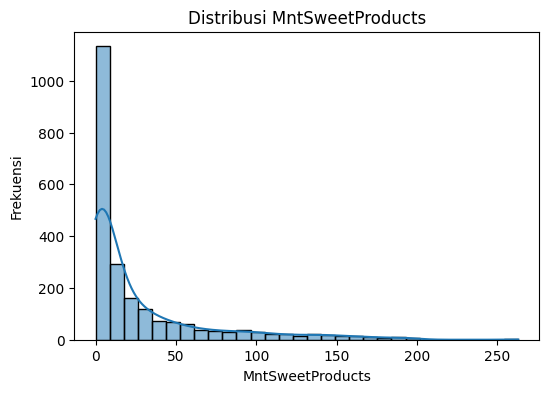

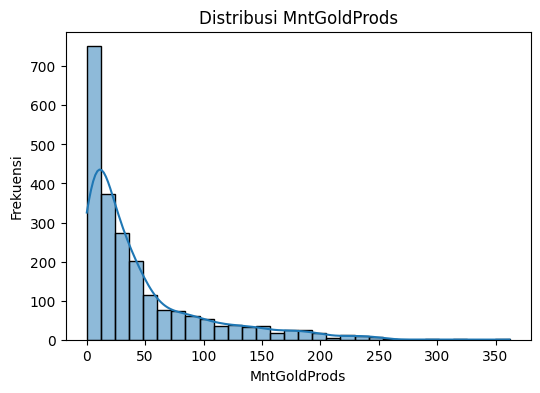

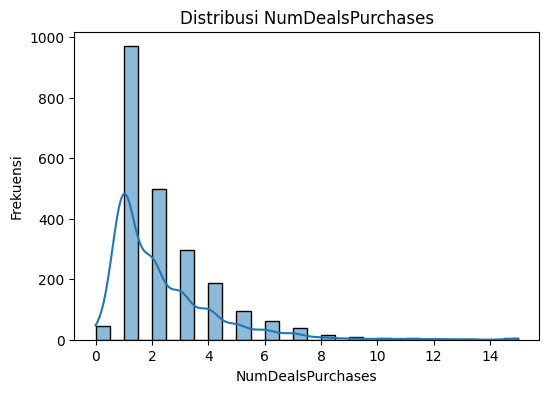

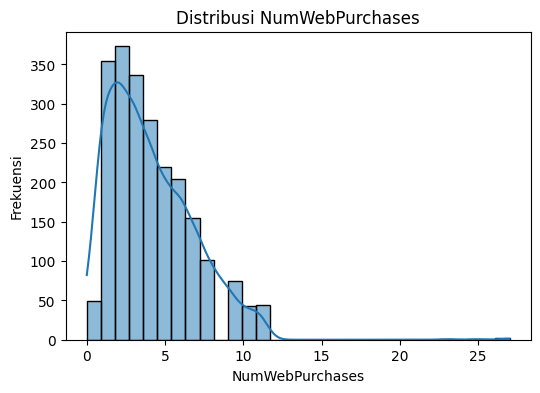

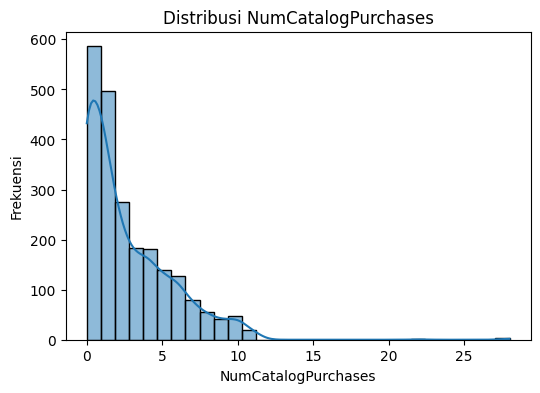

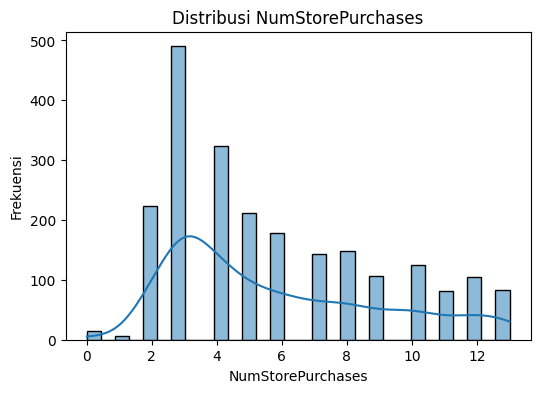

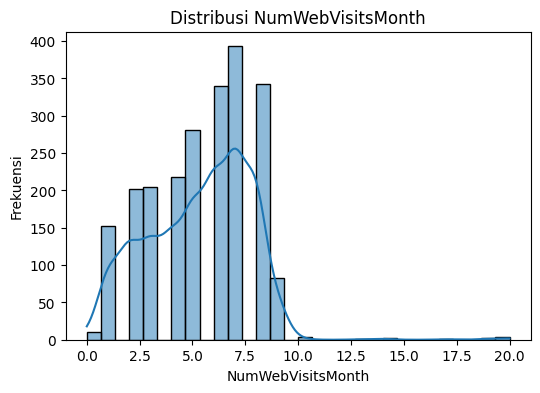

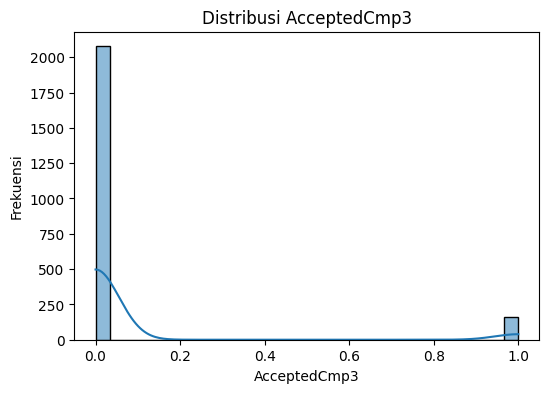

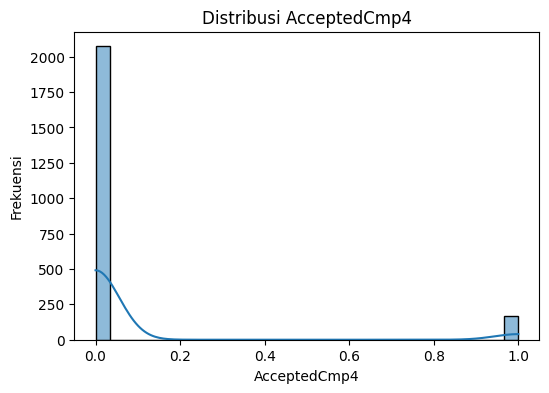

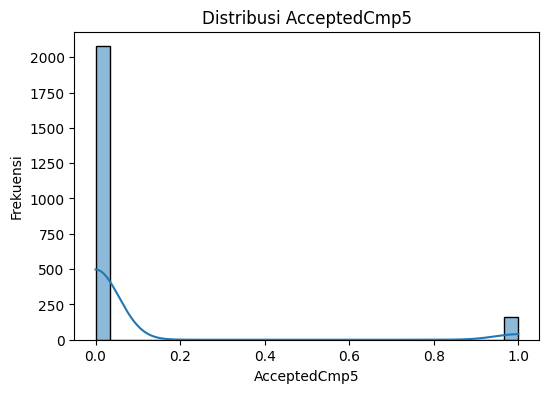

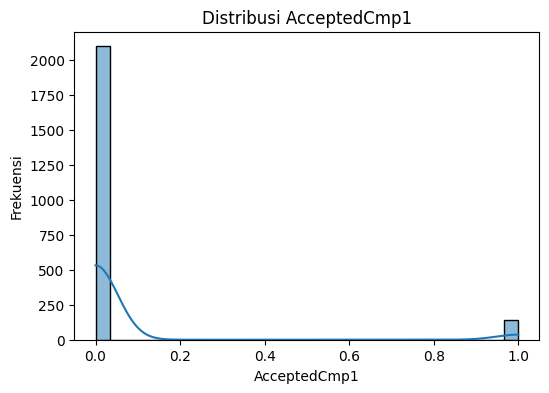

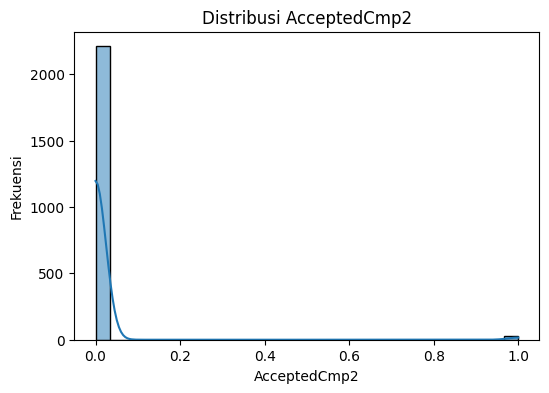

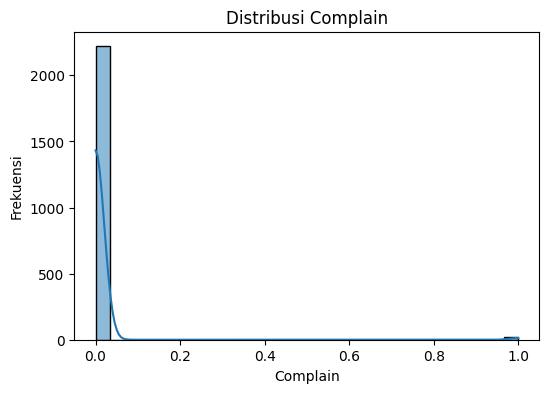

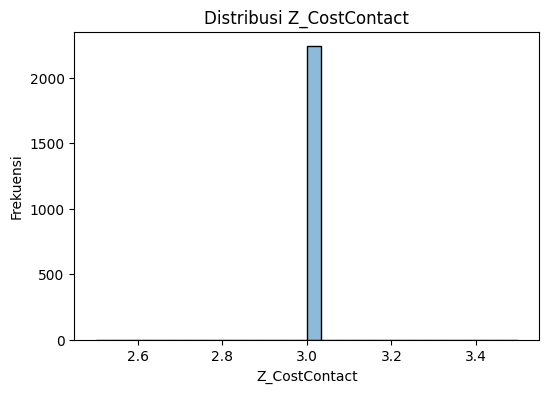

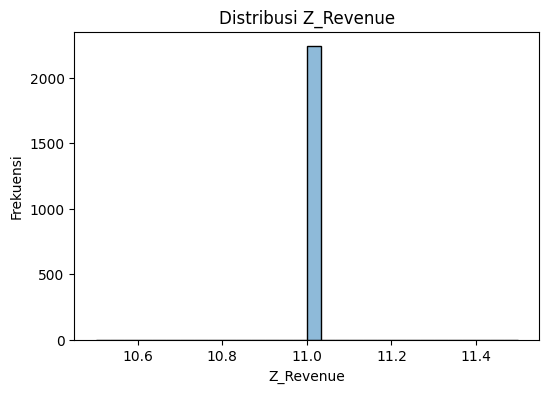

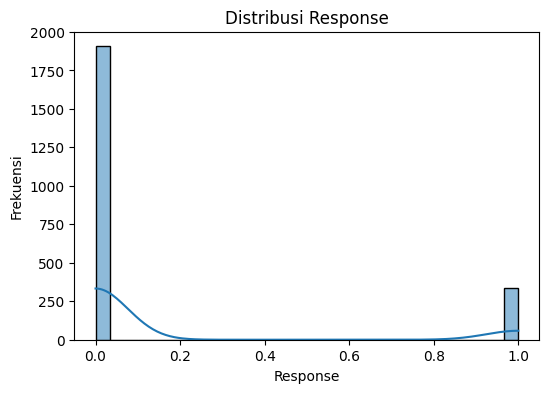

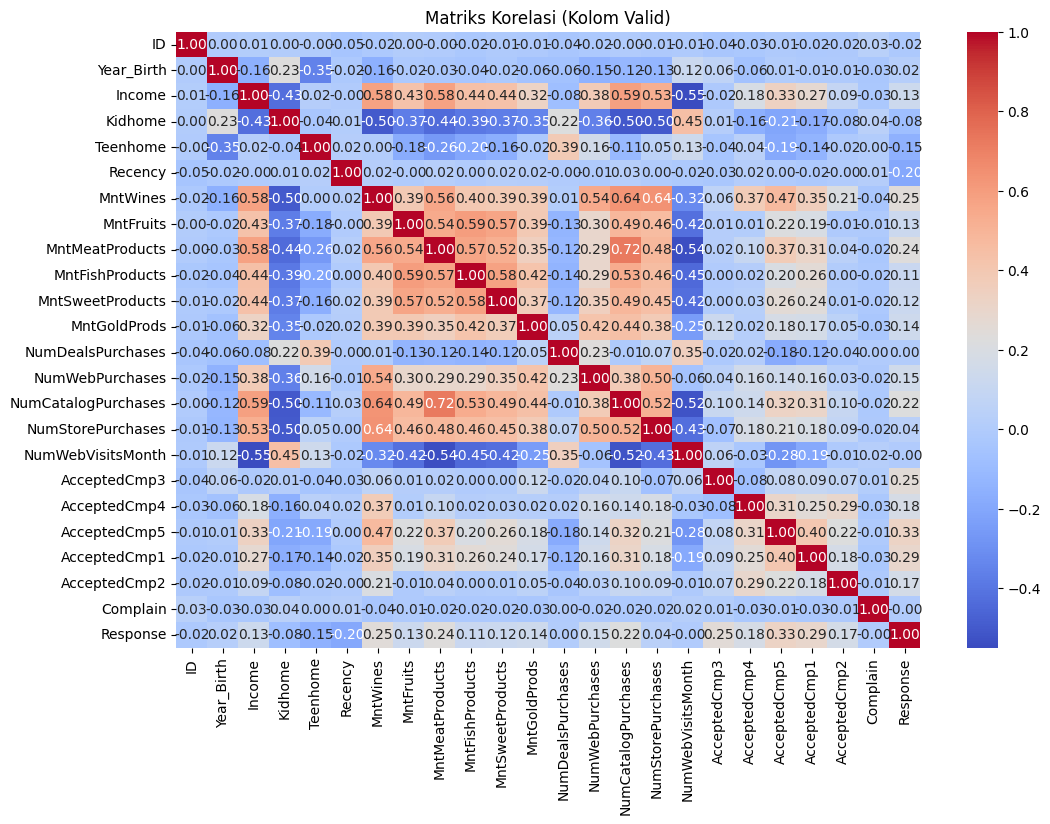

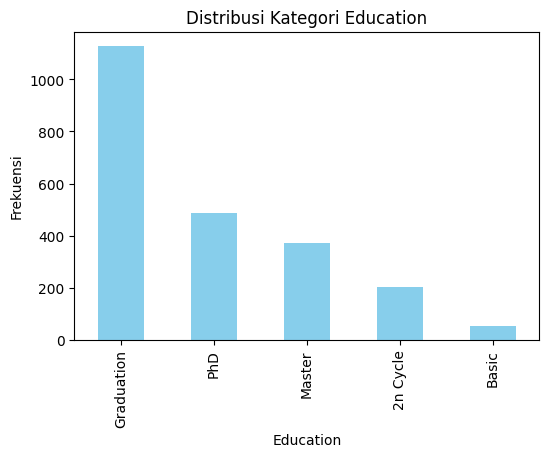

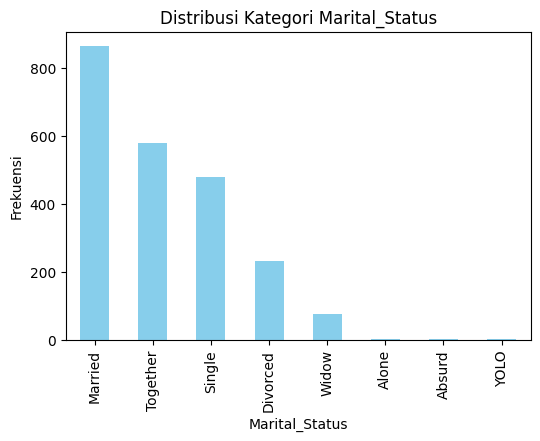


Kolom `Dt_Customer` memiliki terlalu banyak kategori (663). Menampilkan hanya 20 teratas.


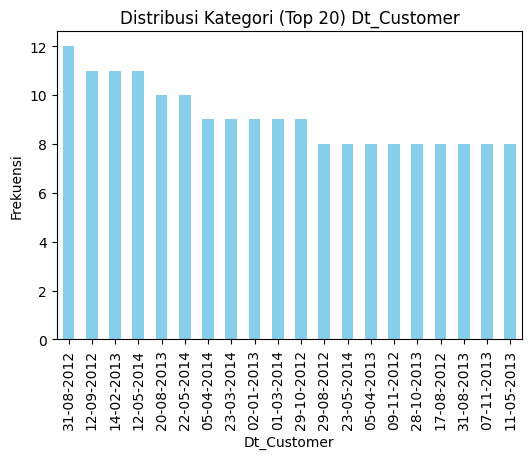

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
file_path = '/content/drive/MyDrive/Dataset Clustering/marketing_campaign.csv'  # Sesuaikan path jika diperlukan
dataset = pd.read_csv(file_path, delimiter='\t')

# Memastikan dataset terbaca dengan benar
print("Beberapa Baris Pertama Dataset:")
print(dataset.head())

# Informasi dataset
print("\nInformasi Dataset:")
print(dataset.info())

# 1. Memahami Struktur Data
print("\nJumlah Baris dan Kolom:")
print(dataset.shape)
print("\nJenis Data pada Setiap Kolom:")
print(dataset.dtypes)

# 2. Menangani Data yang Hilang
print("\nData yang Hilang pada Setiap Kolom:")
missing_values = dataset.isnull().sum()
print(missing_values)

# Mengisi nilai yang hilang pada kolom numerikal dengan mean
for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
    if missing_values[col] > 0:
        dataset[col].fillna(dataset[col].mean(), inplace=True)

# Mengisi nilai yang hilang pada kolom kategorikal dengan modus
for col in dataset.select_dtypes(include=['object']).columns:
    if missing_values[col] > 0:
        dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# 3. Analisis Distribusi dan Korelasi
# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(dataset.describe())

# Visualisasi Distribusi Numerikal (Histogram)
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# Matriks Korelasi
# Filter kolom numerikal
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Hapus kolom yang seluruh nilainya NaN
valid_numerical_cols = dataset[numerical_cols].dropna(axis=1, how='all').columns

# Hapus kolom dengan variansi nol (tidak ada variasi data)
valid_numerical_cols = [
    col for col in valid_numerical_cols if dataset[col].nunique() > 1
]

if valid_numerical_cols:  # Cek jika ada kolom valid yang tersisa
    # Hitung matriks korelasi hanya pada kolom valid
    correlation_matrix = dataset[valid_numerical_cols].corr()

    # Plot heatmap matriks korelasi
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Matriks Korelasi (Kolom Valid)")
    plt.show()
else:
    print("Tidak ada kolom numerikal valid untuk menghitung korelasi.")

# 4. Visualisasi Data Kategorikal
max_unique_values = 20  # Maksimal jumlah kategori yang divisualisasikan
categorical_cols = dataset.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_values = dataset[col].nunique()
    if unique_values > max_unique_values:
        print(f"\nKolom `{col}` memiliki terlalu banyak kategori ({unique_values}). Menampilkan hanya {max_unique_values} teratas.")
        top_categories = dataset[col].value_counts().nlargest(max_unique_values)
        plt.figure(figsize=(6, 4))
        top_categories.plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori (Top {max_unique_values}) {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()
    else:
        plt.figure(figsize=(6, 4))
        dataset[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# 1. Menghapus atau Menangani Data Kosong (Sudah ditangani sebelumnya)
print("Jumlah Nilai Kosong Setelah Penanganan:")
print(dataset.isnull().sum())

# 2. Menghapus Data Duplikasi
print("\nJumlah Baris Sebelum Menghapus Duplikasi:", dataset.shape[0])
dataset.drop_duplicates(inplace=True)
print("Jumlah Baris Setelah Menghapus Duplikasi:", dataset.shape[0])

# 3. Normalisasi atau Standarisasi Fitur
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])
print("\nData Numerikal Setelah Normalisasi/Standarisasi:")
print(dataset[numerical_cols].head())

# 4. Deteksi dan Penanganan Outlier
# Menggunakan metode IQR (Interquartile Range)
Q1 = dataset[numerical_cols].quantile(0.25)
Q3 = dataset[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((dataset[numerical_cols] < (Q1 - 1.5 * IQR)) | (dataset[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nJumlah Outlier Teridentifikasi:", outliers.sum())
# Menghapus outlier jika diperlukan
dataset = dataset.loc[~outliers]
print("Jumlah Baris Setelah Menghapus Outlier:", dataset.shape[0])

# 5. Encoding Data Kategorikal
categorical_cols = dataset.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    dataset.loc[:, col] = le.fit_transform(dataset[col])
    label_encoders[col] = le  # Simpan encoder untuk interpretasi nanti
print("\nData Kategorikal Setelah Encoding:")
print(dataset[categorical_cols].head())

# 6. Binning (Pengelompokan Data)
# Contoh Binning pada kolom numerikal tertentu (misal, Age setelah normalisasi)
if 'Year_Birth' in dataset.columns:
    dataset.loc[:, 'Age_Group'] = pd.cut(dataset['Year_Birth'], bins=5, labels=['Young', 'Adult', 'Middle-Aged', 'Senior', 'Elderly'])
    print("\nDistribusi Age Group:")
    print(dataset['Age_Group'].value_counts())

# Menampilkan dataset hasil preprocessing
print("\nDataset Setelah Preprocessing:")
print(dataset.head())

Jumlah Nilai Kosong Setelah Penanganan:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Jumlah Baris Sebelum Menghapus Duplikasi: 2240
Jumlah Baris Setelah Menghapus Duplikasi: 2240

Data Numerikal Setelah Normalisasi/Standarisasi:
         ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \


<ipython-input-6-2f65a1644bd1>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'Age_Group'] = pd.cut(dataset['Year_Birth'], bins=5, labels=['Young', 'Adult', 'Middle-Aged', 'Senior', 'Elderly'])


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [9]:
from sklearn.cluster import KMeans

# Pilih jumlah cluster awal (misalnya, 3)
n_clusters = 3

# Pilih kolom numerikal untuk clustering
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
clustering_data = dataset[numerical_cols]

# Latih model clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Jumlah klaster: 2, Silhouette Score: 0.25786417626900776 - Tidak Disimpan
Jumlah klaster: 3, Silhouette Score: 0.1791489890063211 - Tidak Disimpan
Jumlah klaster: 4, Silhouette Score: 0.17066675909390747 - Tidak Disimpan
Jumlah klaster: 5, Silhouette Score: 0.134309352302859 - Tidak Disimpan
Jumlah klaster: 6, Silhouette Score: 0.1367100231076887 - Tidak Disimpan
Jumlah klaster: 7, Silhouette Score: 0.12799112694489986 - Tidak Disimpan
Jumlah klaster: 8, Silhouette Score: 0.12579521101038038 - Tidak Disimpan
Jumlah klaster: 9, Silhouette Score: 0.12630042472284853 - Tidak Disimpan
Jumlah klaster: 10, Silhouette Score: 0.12001886951748585 - Tidak Disimpan


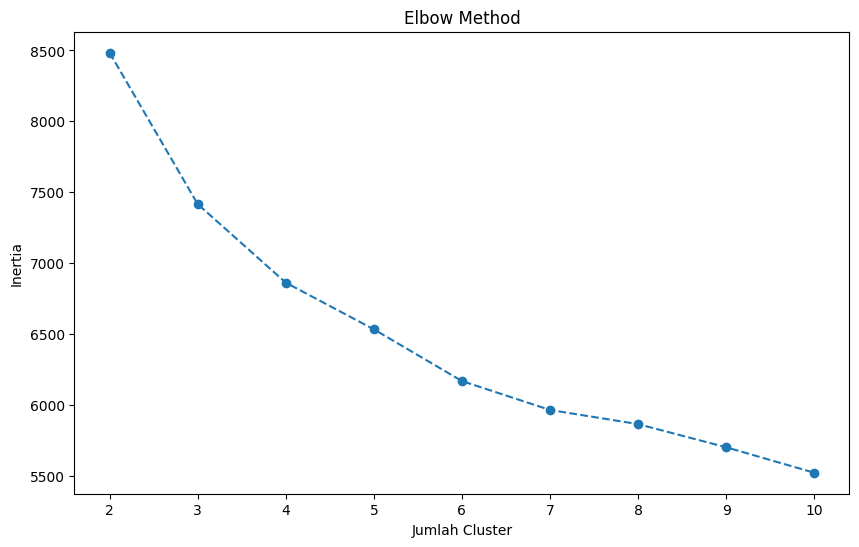

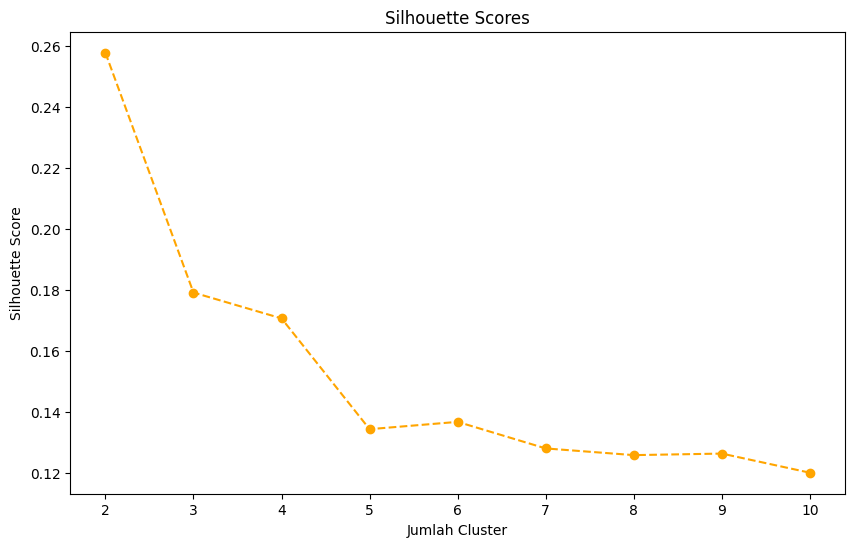


Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Elbow Method untuk menentukan jumlah cluster optimal
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)  # Uji jumlah cluster dari 2 hingga 10

# Variabel untuk menyimpan label klaster yang valid
valid_cluster_labels = []

for n_clusters in range_n_clusters:
    # Melakukan klasterisasi KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_data)

    # Menghitung Silhouette Score untuk hasil klasterisasi
    silhouette_avg = silhouette_score(clustering_data, cluster_labels)

    # Simpan inertia (SSE) untuk Elbow Method
    inertia.append(kmeans.inertia_)

    # Hitung silhouette score
    score = silhouette_score(clustering_data, cluster_labels)
    silhouette_scores.append(score)

    # Jika Silhouette Score >= 0.55, simpan label klaster
    if silhouette_avg >= 0.55:
        valid_cluster_labels.append(cluster_labels)
        print(f"Jumlah klaster: {n_clusters}, Silhouette Score: {silhouette_avg} - Disimpan")
    else:
        print(f"Jumlah klaster: {n_clusters}, Silhouette Score: {silhouette_avg} - Tidak Disimpan")

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.show()

# Pilih jumlah cluster optimal berdasarkan evaluasi
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 karena range dimulai dari 2
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_n_clusters}")


In [11]:
# Menghitung silhoutte score
silhouette_score_original = silhouette_scores[0]  # Score awal dengan seluruh fitur
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original}")

Silhouette Score Tanpa Feature Selection: 0.25786417626900776


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

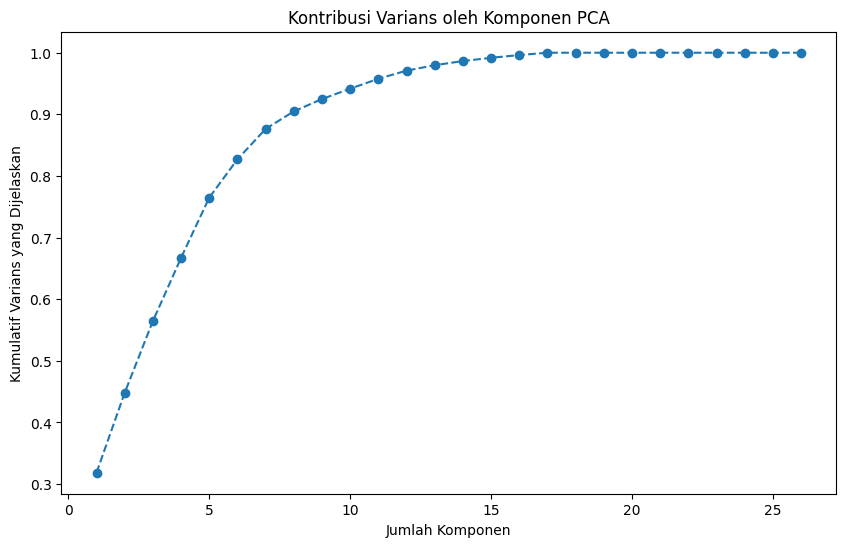

In [12]:
from sklearn.decomposition import PCA

# Lakukan PCA untuk memahami kontribusi fitur
pca = PCA(n_components=len(numerical_cols))
pca_data = pca.fit_transform(clustering_data)

# Plot kontribusi varians setiap komponen
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(numerical_cols)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Kontribusi Varians oleh Komponen PCA')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Varians yang Dijelaskan')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standarisasi data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Fit PCA pada data yang sudah distandarisasi
pca = PCA()
pca.fit(clustering_data_scaled)

# Tentukan jumlah komponen yang menjelaskan 50% varians
n_components_optimal = sum(pca.explained_variance_ratio_.cumsum() <= 0.50)
print(f"\nJumlah fitur optimal berdasarkan PCA: {n_components_optimal}")

# Transformasi data berdasarkan fitur utama
reduced_data = PCA(n_components=n_components_optimal).fit_transform(clustering_data_scaled)



Jumlah fitur optimal berdasarkan PCA: 2


In [14]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Model clustering baru dengan data hasil reduksi dimensi
kmeans_reduced = KMeans(n_clusters=2, random_state=42)
cluster_labels_reduced = kmeans_reduced.fit_predict(reduced_data)

# Hitung Silhouette Score untuk data hasil feature selection
silhouette_score_reduced = silhouette_score(reduced_data, cluster_labels_reduced)
print(f"\nSilhouette Score dengan Feature Selection: {silhouette_score_reduced}")

# Bandingkan dengan Silhouette Score sebelumnya
silhouette_score_original = silhouette_scores[0]  # Score awal dengan seluruh fitur
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original}")

# Jika Silhouette Score >= 0.55, simpan label klaster
if silhouette_score_reduced >= 0.55:
    valid_cluster_labels = cluster_labels_reduced
    print("Silhouette Score", silhouette_score_reduced, "disimpan")

    # Menyimpan hasil cluster ke dalam dataset
    dataset['Cluster'] = valid_cluster_labels
    print("Cluster labels disimpan ke dalam dataset.")

else:
    valid_cluster_labels = None
    print("Silhouette Score < 0.55 tidak disimpan.")

print(valid_cluster_labels)




Silhouette Score dengan Feature Selection: 0.56707748458005
Silhouette Score Tanpa Feature Selection: 0.25786417626900776
Silhouette Score 0.56707748458005 disimpan
Cluster labels disimpan ke dalam dataset.
[1 0 1 ... 1 1 0]


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [15]:
print("Kolom dalam Dataset:")
print(dataset.columns)


Kolom dalam Dataset:
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age_Group', 'Cluster'],
      dtype='object')


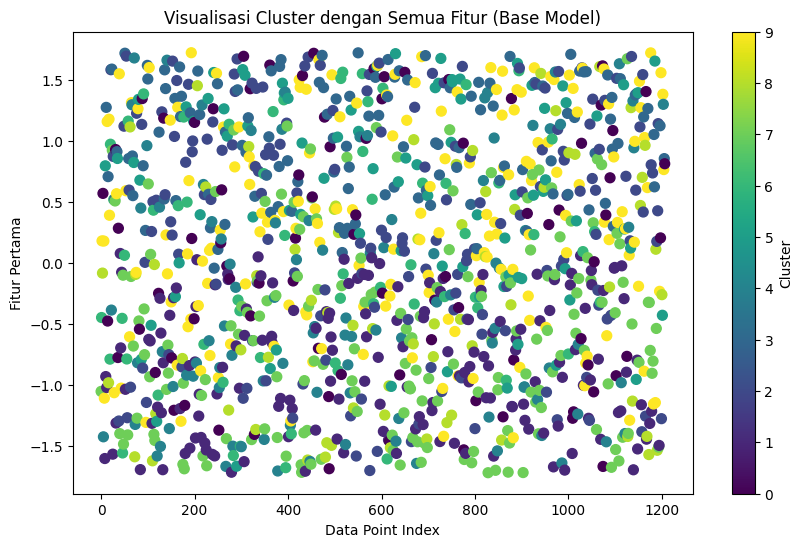

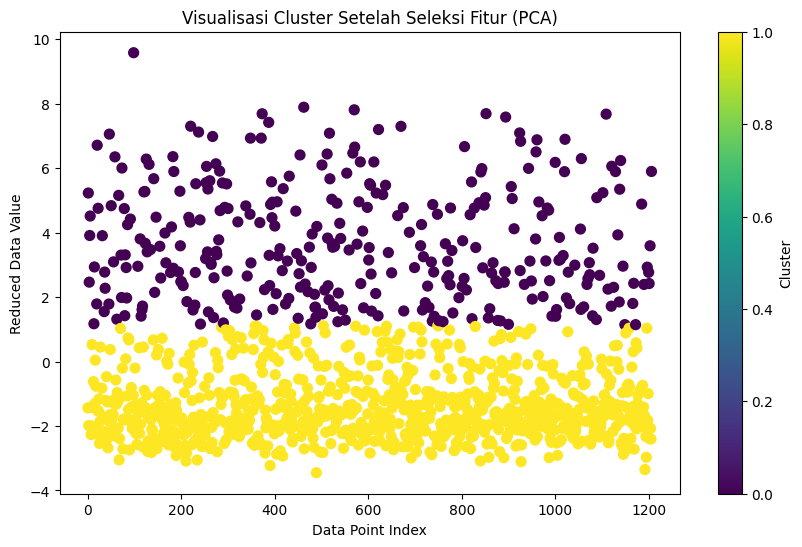

In [16]:
# Bandingkan distribusi cluster baru
# Visualisasi cluster dengan semua fitur (Base Model)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(clustering_data)), clustering_data.iloc[:, 0], c=cluster_labels, cmap='viridis', s=50)
plt.title(f'Visualisasi Cluster dengan Semua Fitur (Base Model)')
plt.colorbar(label='Cluster')
plt.xlabel('Data Point Index')
plt.ylabel('Fitur Pertama')
plt.show()

# Visualisasi cluster setelah seleksi fitur (PCA)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(reduced_data)), reduced_data[:, 0], c=cluster_labels_reduced, cmap='viridis', s=50)
plt.title(f'Visualisasi Cluster Setelah Seleksi Fitur (PCA)')
plt.colorbar(label='Cluster')
plt.xlabel('Data Point Index')
plt.ylabel('Reduced Data Value')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Statistik Deskriptif untuk Tiap Cluster:
               ID  Year_Birth    Income   Kidhome  Teenhome   Recency  \
Cluster                                                                 
0        0.024479   -0.258207  0.308715 -0.566255  0.500605  0.025107   
1        0.005650    0.186179 -0.675684  0.611011 -0.033472  0.069388   

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
Cluster                                                         ...   
0        0.291576  -0.056677        -0.019209        -0.024379  ...   
1       -0.766701  -0.549043        -0.641333        -0.574644  ...   

         NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster                                                                
0                -0.269107      -0.28014      -0.28383      -0.28014   
1                 0.407208      -0.28014      -0.28383      -0.28014   

         AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
Cluster         

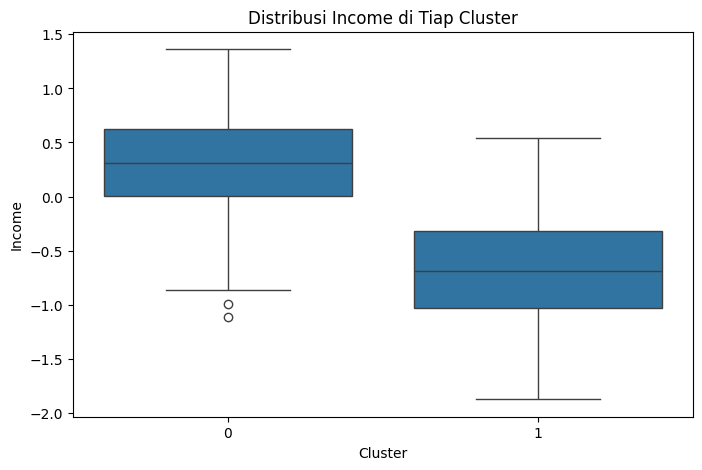

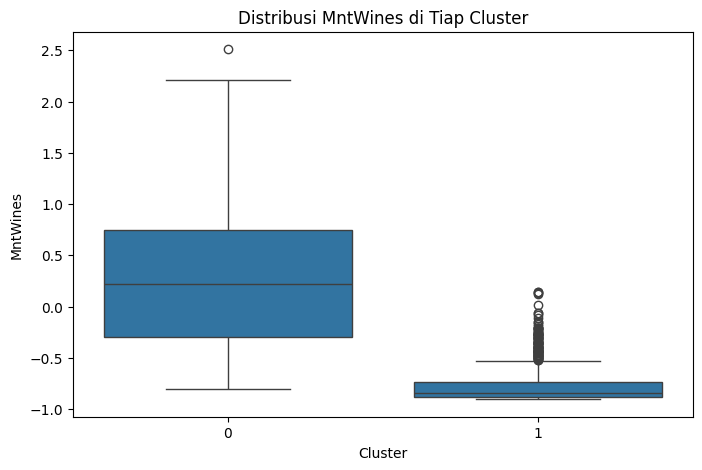

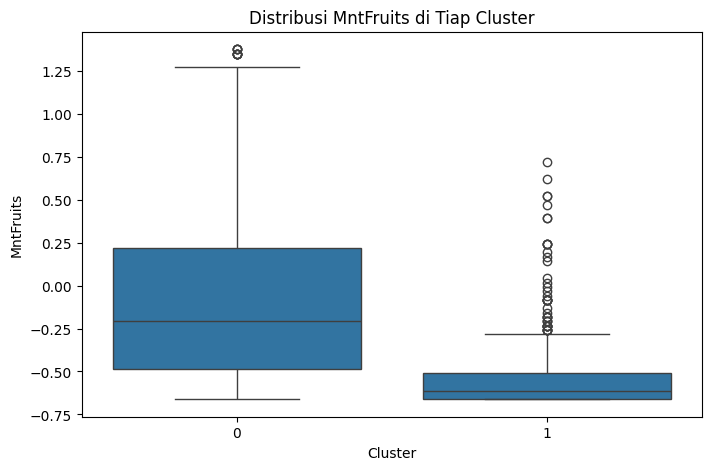

In [17]:
# Pilih hanya kolom numerikal untuk analisis statistik deskriptif
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Analisis statistik deskriptif berdasarkan cluster
cluster_summary = dataset.groupby('Cluster')[numerical_cols].mean()

print("\nStatistik Deskriptif untuk Tiap Cluster:")
print(cluster_summary)

# Lihat distribusi data di setiap cluster untuk beberapa fitur utama
features_to_analyze = ['Income', 'MntWines', 'MntFruits']  # Ganti dengan fitur relevan
for feature in features_to_analyze:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=feature, data=dataset)
    plt.title(f'Distribusi {feature} di Tiap Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()


# Interpretasi Statistik Deskriptif untuk Tiap Cluster

## 1. Cluster 0:

### **Karakteristik:**
- **Year_Birth (Tahun Lahir):** -0.258207  
  Pelanggan dalam cluster ini **lebih tua dari rata-rata**. Nilai negatif ini menunjukkan bahwa mereka lebih tua dibandingkan dengan pelanggan di seluruh dataset.
  
- **Income (Pendapatan):** 0.308715  
  Pendapatan mereka **lebih tinggi dari rata-rata**, menunjukkan daya beli yang lebih baik. Pelanggan di cluster ini memiliki pendapatan yang cukup besar, yang mengindikasikan kekuatan konsumsi yang lebih tinggi.

- **Kidhome (Anak Kecil di Rumah):** -0.566255  
  Mereka memiliki **lebih sedikit anak kecil** dibandingkan rata-rata. Ini menunjukkan bahwa pelanggan di cluster ini cenderung tidak memiliki banyak anak kecil di rumah.

- **Teenhome (Remaja di Rumah):** 0.500605  
  Mereka memiliki **lebih banyak remaja** di rumah. Nilai positif ini mengindikasikan bahwa pelanggan dalam cluster ini cenderung memiliki anak yang lebih besar atau remaja.

- **MntWines (Pengeluaran untuk Anggur):** 0.291576  
  Pengeluaran mereka untuk **anggur lebih tinggi dari rata-rata**, yang menunjukkan bahwa pelanggan di cluster ini memiliki preferensi terhadap produk premium atau lebih mewah seperti anggur.

- **NumWebVisitsMonth (Kunjungan Web per Bulan):** -0.269107  
  Mereka memiliki **kunjungan web yang lebih sedikit** dibandingkan rata-rata. Mungkin mereka tidak terlalu aktif berbelanja atau mencari informasi produk secara online.

### **Interpretasi:**
Cluster 0 berisi **pelanggan yang lebih tua dengan pendapatan tinggi**. Mereka cenderung memiliki **lebih banyak remaja dan lebih sedikit anak kecil** di rumah, yang mengindikasikan bahwa mereka telah melewati fase memiliki anak kecil, tetapi masih memiliki anak yang lebih besar. Pengeluaran mereka untuk **anggur lebih tinggi**, yang menunjukkan preferensi terhadap produk premium. Namun, meskipun pendapatan mereka tinggi, mereka **lebih sedikit mengunjungi situs web**, mungkin lebih memilih berbelanja secara langsung atau menggunakan saluran lain untuk berinteraksi dengan perusahaan.

---

## 2. Cluster 1:

### **Karakteristik:**
- **Year_Birth (Tahun Lahir):** 0.186179  
  Pelanggan dalam cluster ini **lebih muda dari rata-rata**, menunjukkan bahwa mereka cenderung lebih muda dibandingkan pelanggan lainnya.

- **Income (Pendapatan):** -0.675684  
  Pendapatan mereka **di bawah rata-rata**, yang menunjukkan daya beli yang lebih rendah. Pelanggan dalam cluster ini mungkin lebih sensitif terhadap harga dan cenderung memilih produk yang lebih terjangkau.

- **Kidhome (Anak Kecil di Rumah):** 0.611011  
  Mereka memiliki **lebih banyak anak kecil** di rumah dibandingkan rata-rata. Ini menunjukkan bahwa pelanggan di cluster ini cenderung merupakan orang tua muda dengan anak-anak kecil.

- **Teenhome (Remaja di Rumah):** -0.033472  
  Mereka memiliki **lebih sedikit remaja** di rumah, yang menunjukkan bahwa sebagian besar anak mereka mungkin masih dalam usia dini atau anak kecil, dan belum memasuki fase remaja.

- **MntWines (Pengeluaran untuk Anggur):** -0.766701  
  Pengeluaran mereka untuk **anggur sangat rendah**, yang kemungkinan besar disebabkan oleh keterbatasan anggaran dan lebih fokus pada kebutuhan dasar lainnya.

- **NumWebVisitsMonth (Kunjungan Web per Bulan):** 0.407208  
  Mereka **lebih aktif mengunjungi situs web**, yang menunjukkan ketertarikan untuk mencari informasi produk atau promosi, mungkin karena mereka sedang mencari cara untuk menghemat uang atau menemukan produk yang lebih sesuai dengan anggaran mereka.

### **Interpretasi:**
Cluster 1 berisi **pelanggan yang lebih muda dengan pendapatan lebih rendah**. Mereka memiliki **lebih banyak anak kecil di rumah** dan **lebih sedikit remaja**, yang menunjukkan mereka adalah orang tua muda dengan anak-anak kecil. Pengeluaran mereka untuk **anggur sangat rendah**, kemungkinan karena keterbatasan anggaran dan lebih fokus pada kebutuhan dasar keluarga. Namun, mereka **lebih aktif di situs web**, yang menunjukkan ketertarikan pada promosi atau penawaran yang dapat membantu mereka menghemat pengeluaran atau memenuhi kebutuhan keluarga mereka.

---

### **Kesimpulan Umum:**

- **Cluster 0** terdiri dari **pelanggan yang lebih tua dengan pendapatan tinggi**, pengeluaran premium untuk produk seperti anggur, dan lebih banyak remaja di rumah. Mereka kurang aktif mengunjungi situs web.
- **Cluster 1** terdiri dari **pelanggan yang lebih muda**, dengan pendapatan lebih rendah, lebih banyak anak kecil di rumah, dan pengeluaran rendah untuk anggur. Mereka lebih aktif mengunjungi situs web untuk mencari promosi atau penawaran.

Interpretasi ini memberikan gambaran yang jelas tentang karakteristik pelanggan berdasarkan segmentasi mereka, yang dapat membantu dalam perencanaan pemasaran dan strategi produk yang lebih tepat sasaran.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [19]:
# Simpan dataset ke dalam file CSV
output_file = 'hasil_clusteringV2.csv'
dataset.to_csv(output_file, index=False)
print(f"Dataset telah berhasil disimpan ke file: {output_file}")

Dataset telah berhasil disimpan ke file: hasil_clusteringV2.csv
